In [60]:
import cello
import os
import pandas as pd
import scanpy as sc
from anndata import AnnData
import csv

In [45]:
sc.settings.verbosity = 3             
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.8.2 anndata==0.7.8 umap==0.5.2 numpy==1.20.0 scipy==1.7.3 pandas==1.3.4 scikit-learn==1.0.1 statsmodels==0.13.1 python-igraph==0.9.8 pynndescent==0.5.5


In [46]:
df = pd.read_csv(
  "data/exp_matrix.csv",
  index_col=0
)

normalizing counts per cell
    finished (0:00:00)


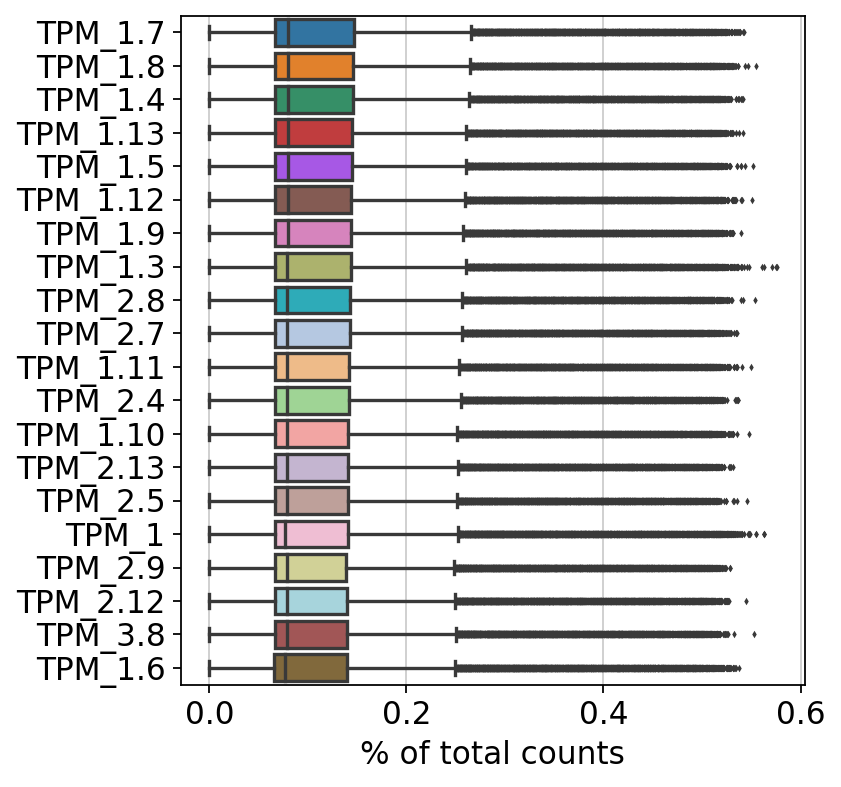

In [47]:
sc.pl.highest_expr_genes(adata, n_top=20) #i 20 geni più espressi
sc.pp.filter_cells(adata, min_genes=200) #filtro le cellule che hanno meno di 200 geni espressi
sc.pp.filter_genes(adata, min_cells=3) #filtro i geni espressi in meno di 3 cellule
adata.var['mt']= adata.var_names.str.startswith('mt-') #annotazione dei gruppi di geni mitocondriali
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True) #calcolo la percentuale di geni mitocondriali

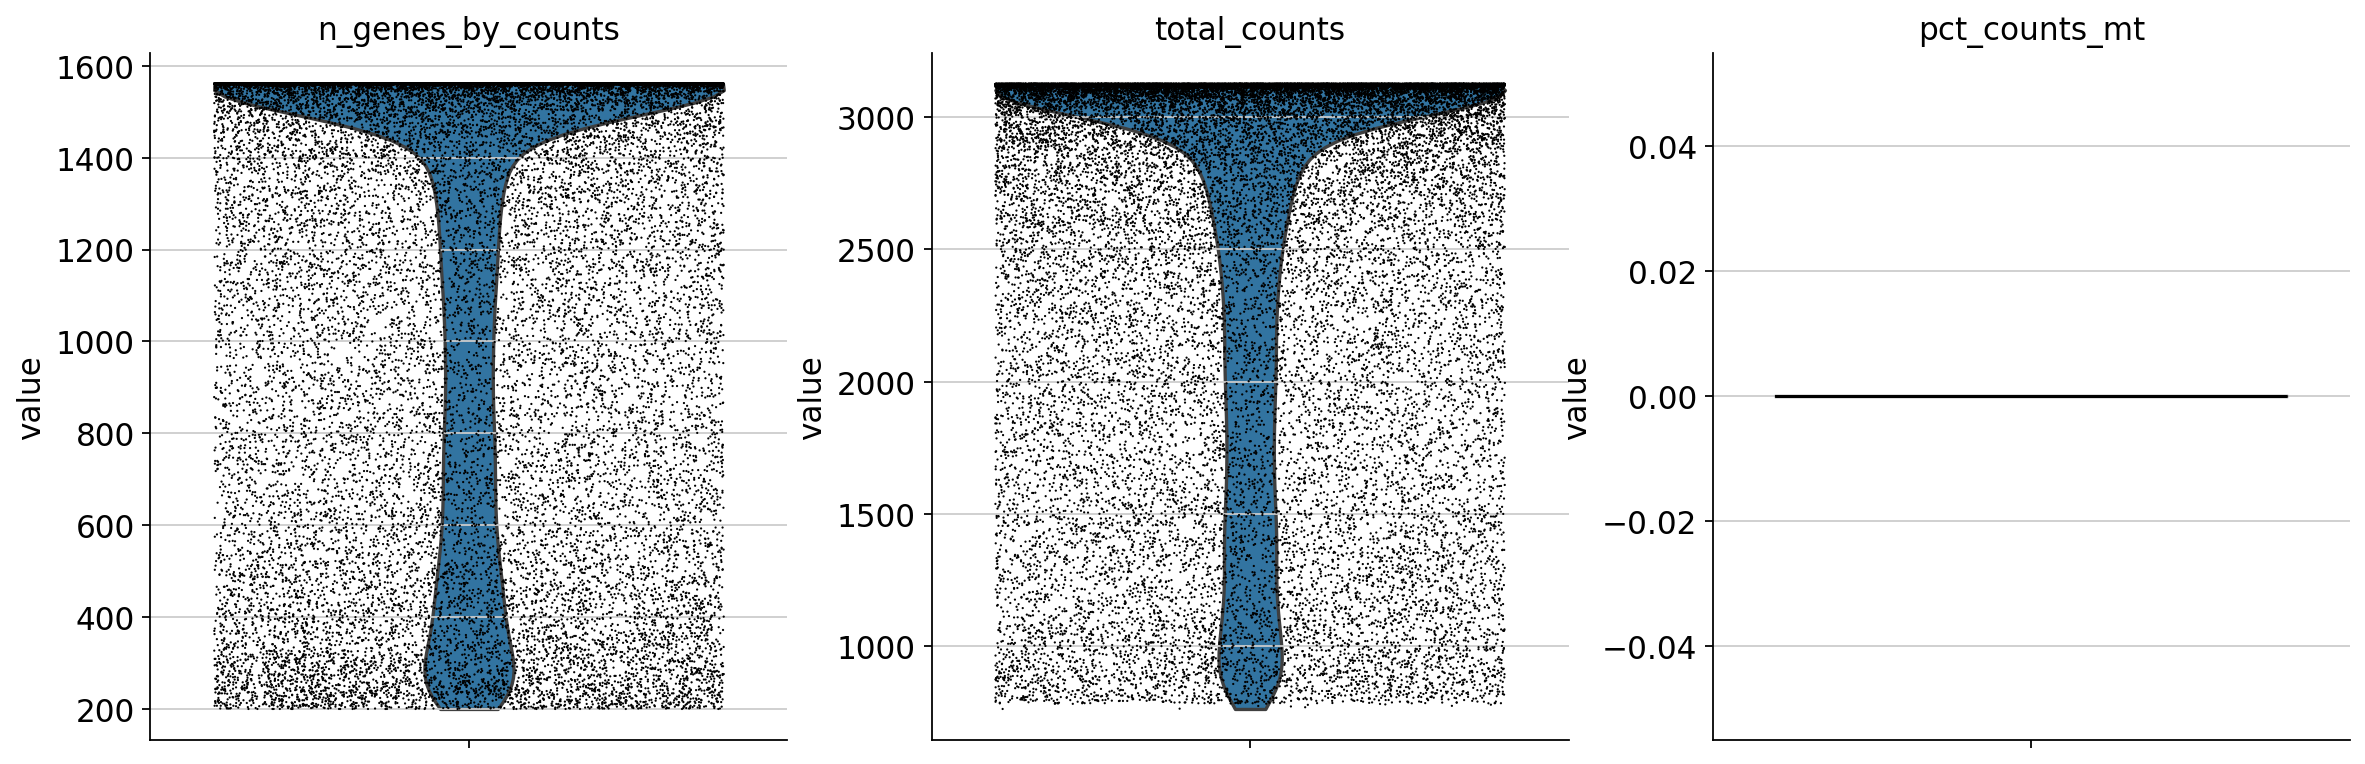

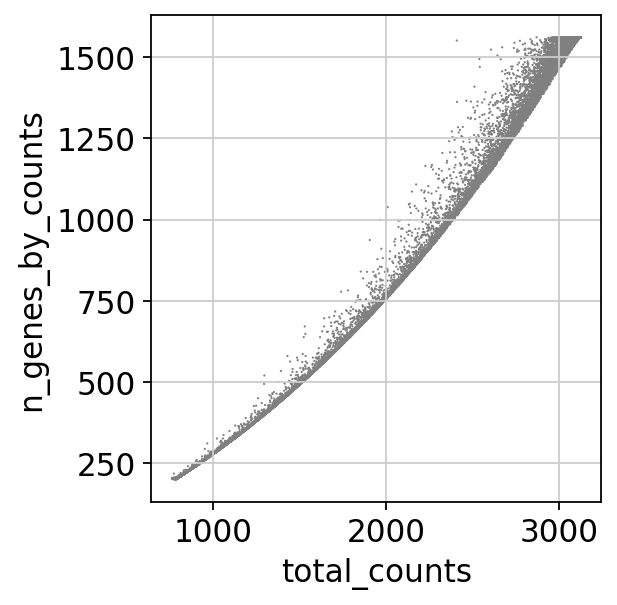

In [48]:
sc.pl.violin(adata, ['n_genes_by_counts','total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)
sc.pl.scatter(adata, x='total_counts',y='n_genes_by_counts')

In [49]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.raw = adata

normalizing counts per cell
    finished (0:00:00)


extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


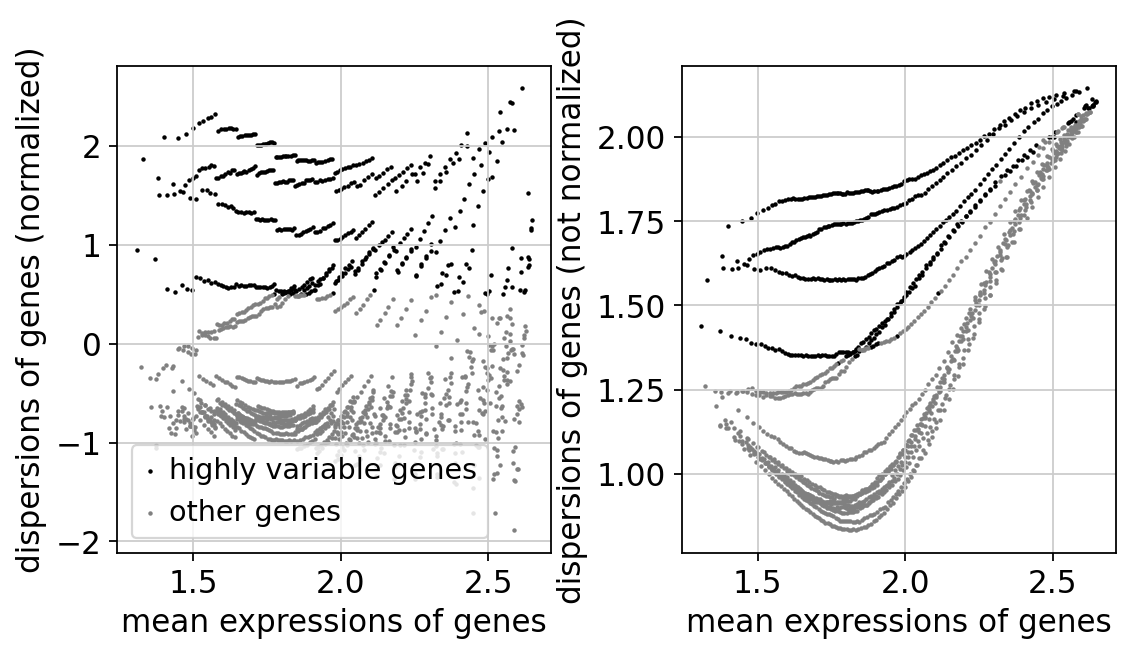

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)


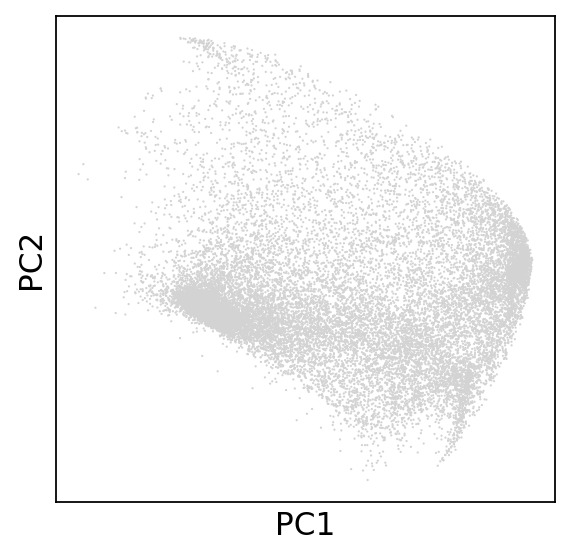

In [50]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5) 
sc.pl.highly_variable_genes(adata)
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata)

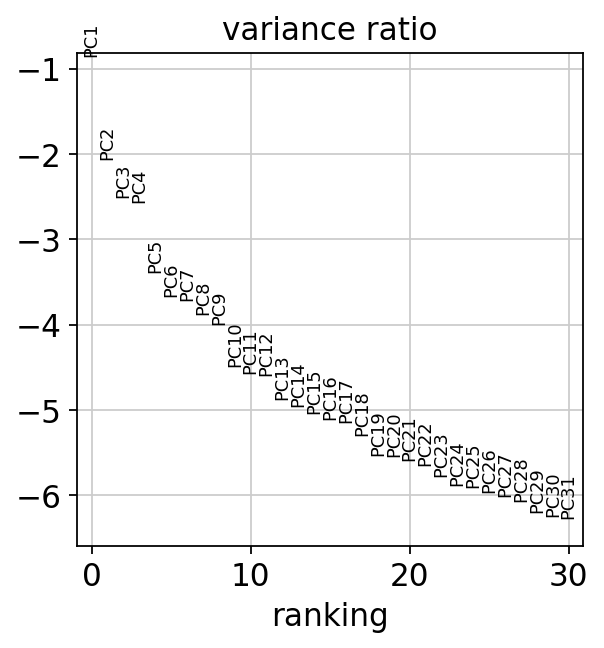

AnnData object with n_obs × n_vars = 30204 × 1561
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'cluster'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'cluster'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [51]:
sc.pl.pca_variance_ratio(adata, log=True)
adata

In [52]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=15) #provo con 15
sc.tl.umap(adata)

computing neighbors
    using 'X_pca' with n_pcs = 15
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:19)


In [64]:
with open('data/cluster.csv', newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

In [70]:
adata.var['cluster'] = data

In [67]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:19)


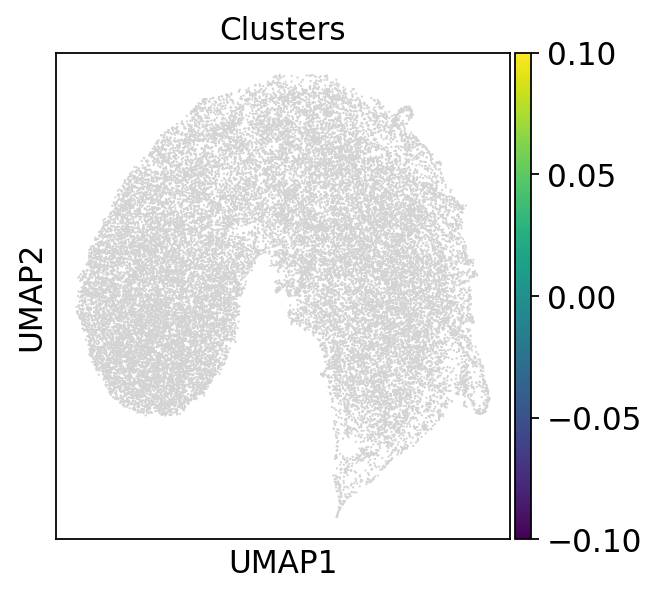

In [68]:
fig = sc.pl.umap(adata, color='cluster', title='Clusters', return_fig=True)